2025-04-09 16:56:59.097310: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-09 16:56:59.113032: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-09 16:56:59.133347: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-09 16:56:59.137196: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-09 16:56:59.146430: I tensorflow/core/platform/cpu_feature_guar

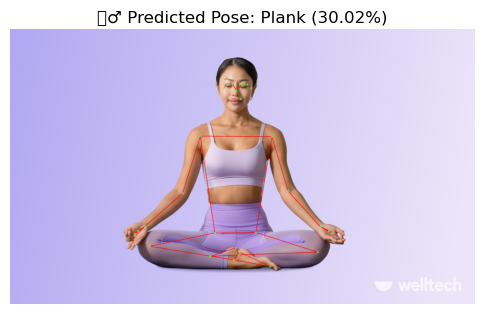

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import cv2
import os
import mediapipe as mp
import warnings

# Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning, module="google.protobuf.symbol_database")

def load_classifier(file_path):
    """Load the trained classifier from the given file path."""
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Classifier file not found at {file_path}.")
    with open(file_path, 'rb') as f:
        model_data = pickle.load(f)
    return model_data['model']

def initialize_pose_detector():
    """Initialize the MediaPipe pose detector."""
    return mp.solutions.pose.Pose(static_image_mode=True)

def predict_pose(img_path, classifier, pose_detector, class_names):
    """Predict pose for a given image and display the result in a notebook."""
    img = cv2.imread(img_path)
    if img is None:
        print(f"❌ Image not found or unreadable: {img_path}")
        return

    # Process the image to detect pose landmarks
    results = pose_detector.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    if not results.pose_landmarks:
        print(f"❌ No pose detected in {img_path}.")
        return

    # Extract landmark data
    landmark_data = []
    for landmark in results.pose_landmarks.landmark:
        landmark_data.extend([landmark.x, landmark.y, landmark.z])

    # Make prediction
    prediction_index = classifier.predict([landmark_data])[0]
    predicted_class = class_names[prediction_index]
    confidence = np.max(classifier.predict_proba([landmark_data]))

    # Draw landmarks and display the result
    draw_landmarks(img, results.pose_landmarks)
    display_prediction(img, predicted_class, confidence)

def draw_landmarks(img, landmarks):
    """Draw pose landmarks on the image."""
    mp_drawing = mp.solutions.drawing_utils
    mp_pose = mp.solutions.pose
    mp_drawing.draw_landmarks(
        img,
        landmarks,
        mp_pose.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),
        mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2)
    )

def display_prediction(img, predicted_class, confidence):
    """Display the image with prediction results."""
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"🧘‍♂️ Predicted Pose: {predicted_class.capitalize()} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()

# 🔹 Entrée : Chemin vers une seule image
image_path = "/home/orlane/projet_reconnaissance/10-Seated-Yoga-Poses_cover.jpg"
classifier_path = "/home/orlane/projet_reconnaissance/pose_classifier.pkl"

try:
    # Charger le modèle
    classifier = load_classifier(classifier_path)

    # Initialiser MediaPipe Pose
    pose_detector = initialize_pose_detector()

    # Définir les classes (doit correspondre aux labels d'entraînement)
    class_names = ['downdog', 'goddess', 'plank', 'side plank', 'tree', 'warrior']

    # Prédire et afficher la pose pour UNE SEULE IMAGE
    predict_pose(image_path, classifier, pose_detector, class_names)

except Exception as e:
    print(f"❌ An error occurred: {e}")
